##** Elections simulations**##

In [ ]:
run_in_colab = False
if 'google.colab' in str(get_ipython()):
    run_in_colab = True
    print('Running on CoLab')
else:
    print('Running locally on Jupyter')
if run_in_colab:
   from google.colab import files
   uploaded = files.upload()

Running on CoLab


Saving votes per ballot 2021.csv to votes per ballot 2021 (1).csv


In [ ]:
# Import modules - from previous lectures & labs 1-2 and web instructions
import io
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib as mp
import matplotlib.pyplot as plt
import sys
from scipy import stats
import statsmodels.api as sm
import random # Of random import sample # Q 2,a


In [ ]:
# From previous lectures
data_type = "ballot"  # city
if   run_in_colab:
    df_2021_raw = pd.read_csv(io.BytesIO(uploaded['votes per ballot 2021.csv']),  encoding = 'iso-8859-8', index_col='שם ישוב')
else:  # read local file
    if data_type == "ballot":
        df_2021_raw = pd.read_csv(data_path + 'votes per ballot 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of ballot
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[8:-1]] # removing "metadata" columns
    else:
        df_2021_raw = pd.read_csv(data_path + 'votes per city 2021.csv',  encoding = 'iso-8859-8', index_col='שם ישוב')
        # preprocessing of cities 
        df_2021 = df_2021_raw.drop('סמל ועדה', axis=1) # new column added in Sep 2019
        df_2021 = df_2021[df_2021.columns[5:-1]] # removing "metadata" columns
# Dataset is now stored in a Pandas Dataframe
df_2021_raw = df_2021_raw[df_2021_raw.index != 'מעטפות חיצוניות']

In [ ]:
# From previous lectures
df_2021 = df_2021_raw
df_2021 = df_2021[df_2021.columns[10:-1]] # removing "metadata" columns

In [ ]:
# Using the function from lab 1 and 2 that keeps only the 13 parties above the blocking precentage
def parties_above_blocking_precentage(df, threshold):
  precent = df.sum().div(df.sum().sum()).sort_values(ascending = False)
  return precent [precent >= threshold]

In [ ]:
# Using lecture 2 dict to change columns names to the original parties names, for better display
df_2021_new = df_2021.rename(columns={'אמת' : "עבודה", 'מרצ' : "מרצ",  'ג' : "יהדות התורה", 'עם'  : "רעם",  'ת'  : "תקוה חדשה", 'ודעם'  : "הרשימה המשותפת", 'ב'  : "ימינה", 'ט'  : "הציונות הדתית",
 'ל'  : "ישראל ביתנו", 'מחל'  : "הליכוד",  'פה'  : "יש עתיד", 'כן'  : "כחול לבן", 'שס'  : "שס"})
total_parties = parties_above_blocking_precentage(df_2021_new, 0.0125) # 0.0325 ruturn only 11 parties
parties_names = total_parties.keys()

In [ ]:
# creating the data with the 13 relevent parties, op = Original Parties names
df_2021_op = df_2021_new[parties_names]
# df_2021_op # checking the 13 parties 

## Question 1 ##

General function which calculate the acctual voters as per different conditinos

In [ ]:
def binominal_simulation(dataset,Vij):
  # The function receive a data frame and Vij the probebilty that a voter will vote eventualyy

  binom_table = pd.DataFrame(np.random.binomial(dataset,Vij))
  
  # Using the random binominal func of pandas as instructed

  binom_table.index = df_2021_op.index
  
  # dataframe.index used to access the index of the column on the Data

  return binom_table   # We will return a new and calculated data frame which display the actual voters - Nij

##Question 2:##




In [ ]:
nij_hat = np.array(df_2021_op.mul(df_2021_raw['בזב'].sum()).div(df_2021_raw['כשרים'].sum()),dtype='int32')

In [ ]:
## 3 types of Vij in Q2:

# αi - i
alpha = df_2021_raw['כשרים'].div(df_2021_raw['בזב'])

# βj - ii
beta = list([0.3,0.5,0.25,0.4,0.7,0.65,0.2,0.45,0.6,0.35,0.55,0.8,0.75])

# βj randomly - iii
beta_random = random.sample(beta, len(beta))

In [ ]:
dim_of_df = df_2021_op.shape

Vai = np.tile(np.array([alpha]).transpose(), (1, len(parties_names)))
Vbj = np.tile(np.array(beta),(dim_of_df[0], 1))

Vbj_random = np.tile(np.array(beta_random),(dim_of_df[0],1))


In [ ]:
def data_correction(df, fix_param):
  p = parties_above_blocking_precentage(df, 0.0125) 
  q_hat = parties_above_blocking_precentage(df.div(fix_param, axis = "rows"), 0.0125)
  return [p, q_hat]

##2.a
 Function that performs a certain number of simulations, in our case: 50.

In [ ]:
def simulations(f_parameter,number_of_sims,nij,vij):
  q_j = np.zeros([number_of_sims, 13])
  p = np.zeros([number_of_sims, 13]) 
  # after correcting the data
  for i in range(0,number_of_sims):
    p[i,], q_j[i,] = data_correction(binominal_simulation(nij,vij), f_parameter)

  return p, q_j


In [ ]:
n = 50

In [ ]:
q_real = nij_hat.sum(axis=0)/(nij_hat.sum())

In [ ]:
# i
sim_alpha = simulations(alpha, n, nij_hat ,Vai)
# ii
sim_beta = simulations(alpha, n, nij_hat, Vbj)
# iii
sim_beta_random = simulations(alpha, n, nij_hat, Vbj_random)


##2.b

In [ ]:
n = 50 # number of simulations
q_real = nij_hat.sum(axis=0)/(nij_hat.sum())
pd.DataFrame(q_real)

##2.c

In [ ]:

mean_p_alpha = sim_alpha[0].mean(axis=0)
mean_q_alpha = sim_alpha[1].mean(axis=0)
bias_q_alpha = mean_q_alpha - q_real
var_q_alpha = sim_alpha[1].var(axis=0)
mse_q_alpha = var_q_alpha + bias_q_alpha**2

mean_p_beta = sim_beta[0].mean(axis=0) 
mean_q_beta = sim_beta[1].mean(axis=0) 
bias_q_beta = mean_q_beta - q_real
var_q_beta = sim_beta[1].var(axis=0)
mse_q_beta = var_q_beta + bias_q_beta**2

mean_p_beta_random = sim_beta_random[0].mean(axis=0)
mean_q_beta_random = sim_beta_random[1].mean(axis=0)
bias_q_beta_random = mean_q_beta_random - q_real
var_q_beta_random = sim_beta_random[1].var(axis=0)
mse_q_beta_random = var_q_beta_random + bias_q_beta_random**2

In [ ]:
pd.DataFrame( [q_real, mean_q_alpha, mean_q_beta, mean_q_beta_random], columns= parties_names, index=['real q', 'mean fixed with alpha', 'mean fixed with beta', 'mean fixed with beta random']).style.set_caption('Mean comparison')

In [ ]:
pd.DataFrame( [bias_q_alpha, bias_q_beta, bias_q_beta_random], columns= parties_names, index=[ 'bias fixed with alpha', 'bias fixed with beta', 'bias fixed with beta random']).style.set_caption('Bias comparison')

In [ ]:
var_q_alpha_df = np.round(var_q_alpha,11)*100000
var_q_beta_df = np.round(var_q_beta,11)*100000
var_q_beta_random_df = np.round(var_q_beta_random,11)*100000

pd.DataFrame( [var_q_alpha_df, var_q_beta_random, var_q_beta_random_df], columns= parties_names, index=[ 'var fixed with alpha - multiplied by 100', 'var fixed with beta - multiplied by 100', 'var fixed with beta random - multiplied by 100']).style.set_caption('Variance comparison, scaled up by 10^5 because values are close to 0')

In [ ]:
mse_q_alpha_df = np.round(mse_q_alpha,8)*100
mse_q_beta_df = np.round(mse_q_beta,8)*100
mse_q_beta_random_df = np.round(mse_q_beta_random,8)*100

dfof2c= pd.DataFrame( [mse_q_alpha_df, mse_q_beta_df, mse_q_beta_random_df], columns= parties_names, index=[ 'mse fixed with alpha i - multiplied by 100', 'mse fixed with beta j- multiplied by 100', 'mse fixed with beta j random- multiplied by 100'])
dfof2c.style.set_table_attributes("style='display:inline'").set_caption('Fixed MSE of q with α, β and random β, scaled up by 100 because values are close to 0')


It seems α is the most accurate of the three corrections. It's means are closest to the real q, it's biases, variances and MSEs are closest to zero. β random seems a little more random and less consistant than β.

##2.d

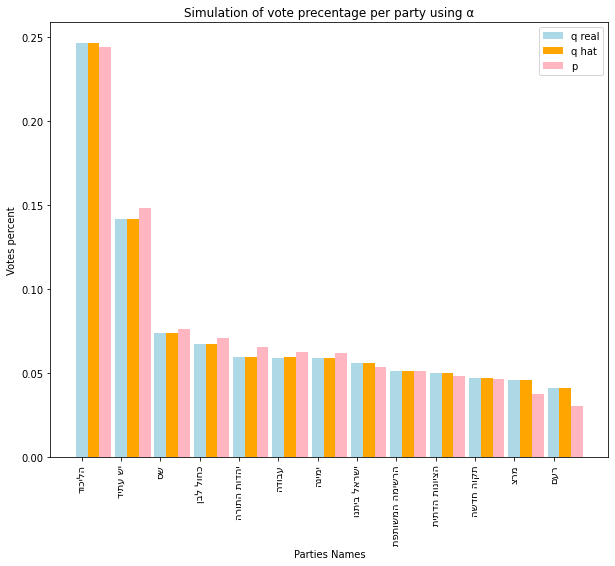

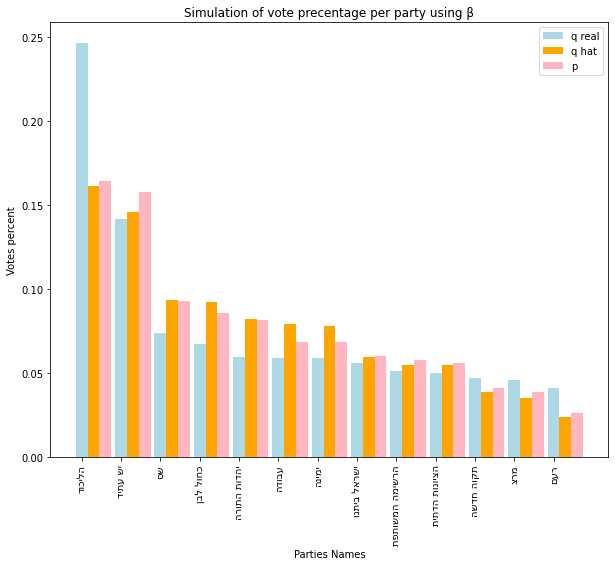

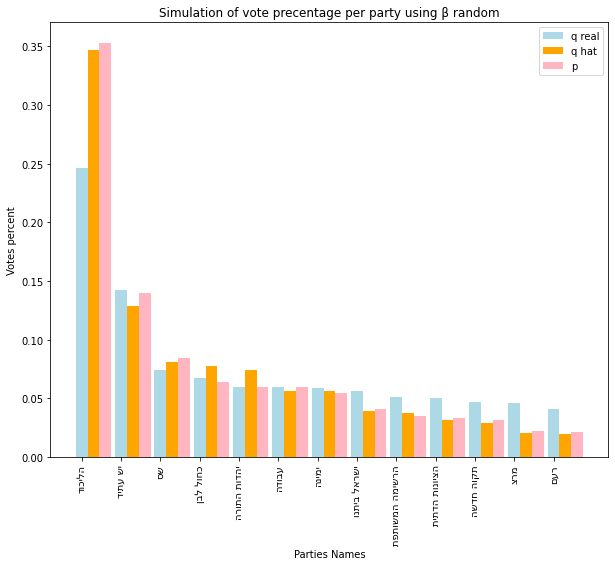

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efbbc8328d0>)

In [ ]:
# Bar plot for a party, only showing values above a certain threshold after correction:
def party_bar_fix(q_real, q_hat, p, v):
    width = 0.3
    n = len(total_parties)

    rev_names = [name[::-1] for name in list(parties_names)]
    fig, ax = plt.subplots(figsize=(10,8))    

    q_real_bar = ax.bar(np.arange(n), list(q_real), width, color='lightblue')
    q_hat_bar = ax.bar(np.arange(n)+width, q_hat, width, color='orange')
    p_bar = ax.bar(np.arange(n)+2*width, p, width, color='lightpink')

    ax.set_ylabel('Votes percent')
    ax.set_xlabel('Parties Names')
    ax.set_title('Simulation of vote precentage per party using ' + v)
    ax.set_xticks(np.arange(n))
    ax.set_xticklabels(rev_names)
    ax.legend((q_real_bar, q_hat_bar, p_bar), ('q real', 'q hat', 'p'))
    plt.xticks(rotation=90)
    plt.show()

    return fig, ax

v1 = 'α'
v2 = 'β'
v3 = 'β random'
party_bar_fix(q_real, mean_q_alpha, mean_p_alpha, v1)
party_bar_fix(q_real, mean_q_beta, mean_p_beta, v2)
party_bar_fix(q_real, mean_q_beta_random, mean_p_beta_random, v3)